In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [94]:
orig_df = pd.read_csv("nor_ayu2.csv")
orig_df.head()

,year,b,c,d,e,f,g,h,i,j,...,Life_Insurance,Farm_holding,Births,Population,th_worker,debt,percent_import_us,population,Planted_area,export
0,0.000000,0.000000,0.000000,0.100632,0.000000,0.000000,0.000000,0.084656,0.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.010043,0.000000,0.925926,0.000000,0.374548,0.000000
1,0.043478,0.085191,0.018404,0.119585,0.047918,0.033991,0.100287,0.854815,0.092795,0.015561,...,0.05071,0.056755,0.948240,0.021497,0.031288,0.041625,0.944444,0.066549,0.000000,0.000706
2,0.086957,0.108983,0.076971,0.101986,0.074806,0.087201,0.183381,0.124868,0.138210,0.054994,...,0.10142,0.113510,0.896480,0.042878,0.096191,0.083249,0.574074,0.138467,0.051973,0.059739
3,0.130435,0.113262,0.135382,0.066336,0.065630,0.177540,0.237822,0.000000,0.191021,0.060779,...,0.15213,0.170265,0.844720,0.064136,0.069879,0.399030,0.962963,0.212607,0.179269,0.125601
4,0.173913,0.141755,0.074943,0.024368,0.099175,0.123415,0.356734,0.048889,0.193139,0.072550,...,0.20284,0.227020,0.792961,0.085266,0.114738,0.166498,0.592593,0.284231,0.538276,0.120552


In [95]:
dummy_df = orig_df.drop(['year'], axis=1)
dummy_df

,b,c,d,e,f,g,h,i,j,k,...,Life_Insurance,Farm_holding,Births,Population,th_worker,debt,percent_import_us,population,Planted_area,export
0,0.000000,0.000000,0.100632,0.000000,0.000000,0.000000,0.084656,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.010043,0.000000,0.925926,0.000000,0.374548,0.000000
1,0.085191,0.018404,0.119585,0.047918,0.033991,0.100287,0.854815,0.092795,0.015561,0.060628,...,0.050710,0.056755,0.948240,0.021497,0.031288,0.041625,0.944444,0.066549,0.000000,0.000706
2,0.108983,0.076971,0.101986,0.074806,0.087201,0.183381,0.124868,0.138210,0.054994,0.007394,...,0.101420,0.113510,0.896480,0.042878,0.096191,0.083249,0.574074,0.138467,0.051973,0.059739
3,0.113262,0.135382,0.066336,0.065630,0.177540,0.237822,0.000000,0.191021,0.060779,0.004067,...,0.152130,0.170265,0.844720,0.064136,0.069879,0.399030,0.962963,0.212607,0.179269,0.125601
4,0.141755,0.074943,0.024368,0.099175,0.123415,0.356734,0.048889,0.193139,0.072550,0.011091,...,0.202840,0.227020,0.792961,0.085266,0.114738,0.166498,0.592593,0.284231,0.538276,0.120552
5,0.232012,0.061218,0.003159,0.166443,0.148908,0.481375,0.087407,0.357463,0.073880,0.071719,...,0.253550,0.283775,0.741201,0.106258,0.183456,0.390866,0.814815,0.349893,0.568654,0.203187
6,0.231761,0.117601,0.010379,0.172581,0.161590,0.508596,0.085926,0.329385,0.087445,0.096858,...,0.304260,0.340531,0.689441,0.178669,0.448511,0.390055,1.000000,0.408776,0.517608,0.220590
7,0.268936,0.127505,0.000000,0.213267,0.184338,0.416905,0.108360,0.388916,0.136188,0.090203,...,0.264352,0.397286,0.637681,0.250641,0.373350,0.481449,0.777778,0.461971,0.669850,0.226445
8,0.347899,0.142166,0.000000,0.306317,0.239247,1.000000,0.122540,0.389959,0.144767,0.107579,...,0.307246,0.454041,0.585921,0.322070,0.247061,0.623539,0.685185,0.510236,0.581325,0.286381
9,0.394197,0.212743,0.130415,0.341522,0.298993,0.948424,0.184127,0.404198,0.157335,0.195194,...,0.236998,0.510796,0.534161,0.392851,0.136082,0.700831,0.500000,0.554953,0.933783,0.368156


In [96]:
orig_df.shape

(24, 33)

In [97]:
orig_df.dtypes

year                 float64
b                    float64
c                    float64
d                    float64
e                    float64
f                    float64
g                    float64
h                    float64
i                    float64
j                    float64
k                    float64
l                    float64
m                    float64
n                    float64
o                    float64
p                    float64
q                    float64
r                    float64
s                    float64
t                    float64
u                    float64
JURISTIC_PERSON      float64
Tourism              float64
Life_Insurance       float64
Farm_holding         float64
Births               float64
Population           float64
th_worker            float64
debt                 float64
percent_import_us    float64
population           float64
Planted_area         float64
export               float64
dtype: object

In [98]:
orig_df.columns

Index(['year', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'JURISTIC_PERSON ', 'Tourism',
       'Life_Insurance', 'Farm_holding', 'Births', 'Population', 'th_worker',
       'debt', 'percent_import_us', 'population', 'Planted_area', 'export'],
      dtype='object')

In [99]:
input_vars = [ 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'JURISTIC_PERSON ', 'Tourism',
       'Life_Insurance', 'Farm_holding', 'Births', 'Population', 'th_worker',
       'debt', 'percent_import_us', 'population', 'Planted_area', 'export']
len(input_vars)

31

In [100]:
df = orig_df.dropna()
X = df[input_vars]
y = df.b
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04424832348389808, 0.9774153464467272]

In [101]:
df = dummy_df

# Filter

## low variance

In [102]:
# Compute variance of each feature
df.var()

b                    0.117204
c                    0.073846
d                    0.095275
e                    0.122683
f                    0.068383
g                    0.070365
h                    0.079474
i                    0.068551
j                    0.104385
k                    0.097853
l                    0.093699
m                    0.107627
n                    0.049352
o                    0.124784
p                    0.106406
q                    0.113085
r                    0.071740
s                    0.096731
t                    0.073432
u                    0.119966
JURISTIC_PERSON      0.092792
Tourism              0.099104
Life_Insurance       0.109236
Farm_holding         0.122513
Births               0.096530
Population           0.128749
th_worker            0.129107
debt                 0.101485
percent_import_us    0.071317
population           0.091596
Planted_area         0.081497
export               0.113398
dtype: float64

In [103]:
min_var_threshold = 0.12
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['e', 'o', 'Farm_holding', 'Population', 'th_worker']

In [104]:
len(updated_vars)

5

In [105]:
df2 = df[updated_vars]
df2['b']=df.b
df2.head()

<ipython-input-105-9588ce268da4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['b']=df.b


,e,o,Farm_holding,Population,th_worker,b
0,0.000000,0.000000,0.000000,0.000000,0.010043,0.000000
1,0.047918,0.036606,0.056755,0.021497,0.031288,0.085191
2,0.074806,0.041883,0.113510,0.042878,0.096191,0.108983
3,0.065630,0.053178,0.170265,0.064136,0.069879,0.113262
4,0.099175,0.048232,0.227020,0.085266,0.114738,0.141755


In [106]:
df2 = df2.dropna()
X = df2[updated_vars]
y = df2['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.025579569541425373, 0.9924524455361171]

In [107]:
x1 = df['e'].to_numpy()
x2 =df['o'].to_numpy()
x3 = df['Farm_holding'].to_numpy()
x4 =df['Population'].to_numpy()
x5 = df['th_worker'].to_numpy()
y = df['b'].to_numpy()

In [108]:
def test(X, a, b, c, d, e, f):
    x1, x2, x3, x4, x5 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5

In [109]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5), ydata, maxfev=20000) 
param

array([ 0.0415483 ,  0.87996091, -0.036327  ,  0.03986387,  0.09893573,
       -0.00469885])

In [110]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5)
predictions

array([0.04150111, 0.08662651, 0.11416852, 0.11017318, 0.14401264,
       0.20372755, 0.21516554, 0.26250985, 0.35427105, 0.38799528,
       0.40878469, 0.46692992, 0.58493862, 0.88627461, 0.72774689,
       0.89633098, 0.70971693, 0.71161808, 0.98862416, 0.86167212,
       1.01425352, 0.94125352, 0.93237361, 0.92563688])

In [111]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9973020202556581

In [112]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse

0.017407985757681543

## High Correlation Filtering

<AxesSubplot:>

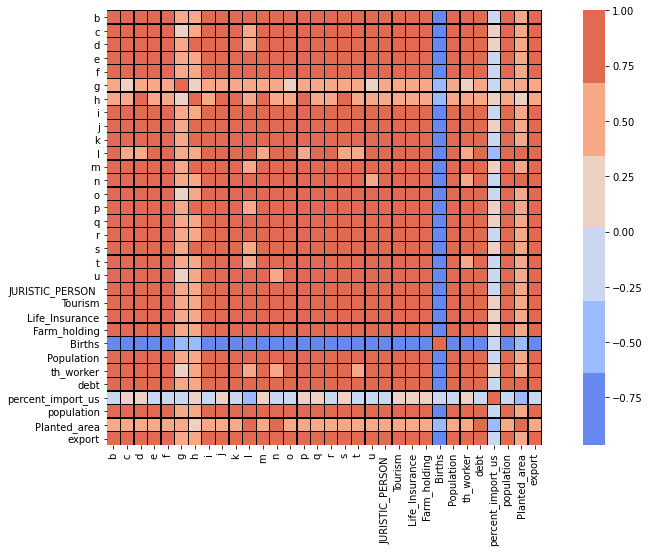

In [113]:
df = dummy_df.copy()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=False)

In [114]:
df = df.dropna()
X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04424832348389808, 0.9774153464467272]

In [115]:
df.shape

(24, 32)

In [116]:
df.drop([ 'Births', 'Farm_holding','j','k','Life_Insurance','d','f','export','population','m','l','n','JURISTIC_PERSON ','s','p','Population','q','r','o'
       ], 1, inplace=True)
df.shape

(24, 13)

In [117]:
updated_vars = list(input_vars)
# updated_vars.remove('c')
updated_vars.remove('d')
# updated_vars.remove('e')
updated_vars.remove('f')
updated_vars.remove('j')
updated_vars.remove('k')
updated_vars.remove('l')
updated_vars.remove('m')
updated_vars.remove('n')
updated_vars.remove('o')
updated_vars.remove('p')
updated_vars.remove('q')
updated_vars.remove('r')
updated_vars.remove('s')
# updated_vars.remove('t')
# updated_vars.remove('u')
updated_vars.remove('JURISTIC_PERSON ')
# # updated_vars.remove('Tourism')
updated_vars.remove('Life_Insurance')
updated_vars.remove('Farm_holding')
updated_vars.remove('Births')
updated_vars.remove('Population')
# updated_vars.remove('th_worker')
# updated_vars.remove('debt')
updated_vars.remove('population')
updated_vars.remove('export')
len(updated_vars )

12

In [118]:
df = df.dropna()
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.016387911990452312, 0.9969021025446179]

In [119]:
updated_vars

['c',
 'e',
 'g',
 'h',
 'i',
 't',
 'u',
 'Tourism',
 'th_worker',
 'debt',
 'percent_import_us',
 'Planted_area']

In [120]:
x1 = df['c'].to_numpy()
x2 =df['e'].to_numpy()
x3 = df['g'].to_numpy()
x4 =df['h'].to_numpy()
x5 = df['i'].to_numpy()
x6 = df['t'].to_numpy()
x7 =df['u'].to_numpy()
x8 = df['Tourism'].to_numpy()
x9 =df['th_worker'].to_numpy()
x10 = df['debt'].to_numpy()
x11 =df['percent_import_us'].to_numpy()
x12 = df['Planted_area'].to_numpy()
y = df['b'].to_numpy()


In [121]:
def test(X, a, b, c, d, e, f, g, h, i, j, k, l, m):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7 +i*x8 +j*x9 +k*x10 +l*x11 +m*x12


In [122]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12), ydata, maxfev=20000) 
param

array([ 0.02209629,  0.09866428,  0.68682784,  0.02001344,  0.04878253,
        0.26163309, -0.07803381,  0.09021827, -0.03550414,  0.00103492,
       -0.00534603, -0.03485636,  0.0188903 ])

In [123]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7+ param[8]*x8+ param[9]*x9+ param[10]*x10 + param[11]*x11+ param[12]*x12)
predictions

array([0.00103734, 0.08757398, 0.10600027, 0.10751444, 0.14383778,
       0.23092804, 0.2276416 , 0.27813886, 0.35036465, 0.38755815,
       0.40865841, 0.47395743, 0.60286285, 0.90350622, 0.72837557,
       0.87210701, 0.68902809, 0.72119715, 0.9858776 , 0.84293039,
       1.00056094, 0.92865519, 0.94224547, 0.95574837])

In [124]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9998492800603007

In [125]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse

0.004114476026081006

# Wrapper Methods

## Forward Feature Selection

In [126]:
df = dummy_df.copy()
df = df.dropna()

In [127]:
from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df.b)
fstat

array([1.04135703e+02, 5.49336238e+01, 5.82157528e+03, 8.63039964e+01,
       5.67551304e+00, 1.27884760e+01, 1.21854192e+02, 1.99023990e+02,
       2.76471093e+02, 3.60539343e+01, 8.81056610e+01, 3.50794631e+01,
       2.26414320e+02, 1.15133286e+02, 2.68663200e+02, 2.01172257e+02,
       1.03917365e+02, 3.71043532e+01, 1.41540547e+02, 2.92753198e+02,
       1.52321150e+02, 1.85589087e+02, 1.48242425e+02, 1.22455336e+02,
       4.01851589e+02, 1.12697433e+02, 8.77394428e+01, 3.16457954e-02,
       2.25882510e+02, 9.80940914e+00, 2.94012411e+02])

In [128]:
pval

array([8.33866199e-10, 2.04793248e-07, 3.62852705e-28, 4.53060254e-09,
       2.62740515e-02, 1.68579400e-03, 1.94144493e-10, 1.67648016e-12,
       6.07738456e-14, 4.82249875e-06, 3.77159775e-09, 5.83633151e-06,
       4.61206897e-13, 3.29948949e-10, 8.14281640e-14, 1.50653663e-12,
       8.50050346e-10, 3.94044911e-06, 4.68991259e-11, 3.38187075e-14,
       2.31371579e-11, 3.35273751e-12, 3.00675387e-11, 1.85376960e-10,
       1.26964189e-15, 4.02481075e-10, 3.91385060e-09, 8.60435108e-01,
       4.72253484e-13, 4.84806172e-03, 3.23611442e-14])

In [129]:
f_value_threshold = 200  # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['e', 'k', 'o', 'q', 'r', 'JURISTIC_PERSON ', 'Population', 'population']

In [130]:
len(updated_vars)

8

In [131]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.019226250092968217, 0.9957360807979906]

In [132]:
x1 = df['e'].to_numpy()
x2 =df['k'].to_numpy()
x3 = df['o'].to_numpy()
x4 =df['q'].to_numpy()
x5 = df['r'].to_numpy()
x6 = df['JURISTIC_PERSON '].to_numpy()
x7 =df['Population'].to_numpy()
x8 = df['population'].to_numpy()

y = df['b'].to_numpy()

In [133]:
def test(X, a, b, c, d, e, f, g, h, i):
    x1, x2, x3, x4, x5, x6, x7, x8 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7 +i*x8


In [134]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7, x8), ydata, maxfev=20000) 
param

array([ 0.01055583,  0.83103262,  0.18681932,  0.05634852, -0.00593615,
        0.00856086,  0.03054074, -0.31150342,  0.2631795 ])

In [135]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7+ param[8]*x8)
predictions

array([0.01055583, 0.07595571, 0.102183  , 0.10885625, 0.15128022,
       0.234903  , 0.24228267, 0.26481131, 0.33741685, 0.38623712,
       0.40585343, 0.47916873, 0.60709461, 0.89975326, 0.7357628 ,
       0.88054386, 0.68274345, 0.71402819, 0.97493576, 0.84906761,
       1.0056671 , 0.93219414, 0.940893  , 0.95411787])

In [136]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9995882015802375

In [137]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse

0.006800980320574334

## Recursive Feature Elimination

In [138]:
df = dummy_df.copy()
df = df.dropna()

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['b']
n_features = 7  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X, y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [140]:
model.ranking_

array([ 2, 13,  1,  5, 16,  9,  1,  3,  1, 24, 10, 20,  1, 25,  6, 23,  1,
        4,  8, 11,  7, 18, 21, 17,  1, 14, 22, 15,  1, 12, 19])

In [141]:
model.estimator_.coef_

array([ 0.80581924,  0.04586084,  0.18771105,  0.07223761, -0.01493623,
       -0.27106963,  0.23363085])

In [142]:
updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['e', 'i', 'k', 'o', 's', 'Population', 'population']

In [143]:
len(updated_vars)

7

In [144]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.009479972265109684, 0.9989633457666938]

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
n_features = 7  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([1.00298014, 0.84188617, 0.10850238, 0.47026964, 0.8769829 ,
       0.24173157, 0.61218933, 0.6861261 ])

In [146]:
x1 = df['e'].to_numpy()
x2 =df['i'].to_numpy()
x3 = df['k'].to_numpy()
x4 =df['o'].to_numpy()
x5 = df['s'].to_numpy()
x6 = df['population'].to_numpy()
x7 =df['population'].to_numpy()

y = df['b'].to_numpy()

In [147]:
def test(X, a, b, c, d, e, f, g, h):
    x1, x2, x3, x4, x5, x6, x7 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7


In [148]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7), ydata, maxfev=20000) 
param

array([ 1.88466204e-02,  7.27837004e-01,  1.71330278e-01,  1.05953286e-01,
        8.64090981e-02, -8.93999797e-02,  2.60906982e+02, -2.60870417e+02])

In [149]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7)
predictions


array([0.01503209, 0.08164177, 0.10581076, 0.10929357, 0.13398893,
       0.22756573, 0.23511228, 0.27054083, 0.34074998, 0.39256883,
       0.40753912, 0.47640752, 0.61153177, 0.89319449, 0.72751187,
       0.88845638, 0.7020992 , 0.7095993 , 0.96483653, 0.84179583,
       1.00989338, 0.9396328 , 0.94584468, 0.94565835])

In [150]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9992179806984313

In [151]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse



0.009372121636371114

# Embedded Methods

## Regression & Lasso (L1)

In [152]:
df = dummy_df.copy()
df = df.dropna()
X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [153]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04424832348389808, 0.9774153464467272]

In [154]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=0.001)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.009803643016843902, 0.998891349213212]

In [155]:
[model.coef_, model.intercept_]

[array([ 0.        ,  0.        ,  0.8119514 ,  0.        ,  0.        ,
         0.01007308,  0.02691121,  0.04263775,  0.00968065,  0.        ,
         0.        ,  0.03525855,  0.        ,  0.        ,  0.00157177,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.04452659, -0.        ,  0.        ,
         0.        ,  0.04318137, -0.        ,  0.        ,  0.        ,
         0.        ]),
 0.020717557872880155]

In [156]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[0.0015717678100802494,
 0.009680649982784867,
 0.010073081758820445,
 0.02691121010689031,
 0.03525854847985917,
 0.042637752392865255,
 0.043181368856821,
 0.04452659247936031,
 0.8119513997088083]

In [157]:
update_vars

['q', 'k', 'h', 'i', 'n', 'j', 'debt', 'Farm_holding', 'e']

In [158]:
len(update_vars)

9

In [159]:
x1 = df['q'].to_numpy()
x2 =df['k'].to_numpy()
x3 = df['h'].to_numpy()
x4 =df['i'].to_numpy()
x5 = df['n'].to_numpy()
x6 = df['j'].to_numpy()
x7 =df['debt'].to_numpy()
x8 = df['Farm_holding'].to_numpy()
x9 =df['e'].to_numpy()

y = df['b'].to_numpy()


In [160]:
def test(X, a, b, c, d, e, f, g, h, i, j):
    x1, x2, x3, x4, x5, x6, x7, x8, x9 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7 +i*x8 +j*x9 

In [161]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7, x8, x9), ydata, maxfev=20000) 
param


array([ 0.01158962, -0.01571005,  0.01774871,  0.02272315,  0.02534368,
        0.07555822,  0.0277025 ,  0.03416808,  0.02872813,  0.83281218])

In [162]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7+ param[8]*x8+ param[9]*x9)
predictions


array([0.01351327, 0.08461464, 0.10176121, 0.11410433, 0.14824931,
       0.2192359 , 0.22029499, 0.26891305, 0.35541914, 0.39310779,
       0.4065213 , 0.47545822, 0.60438031, 0.90162499, 0.73083093,
       0.86993743, 0.69140486, 0.71830595, 0.97543412, 0.83639363,
       1.00690355, 0.93571985, 0.95684512, 0.94733186])

In [163]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9994903365060235

In [164]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse


0.007566080259638413

In [165]:
lasso2 = Lasso(alpha=0.01)
model2 = lasso2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred2)]

[0.009803643016843902, 0.9968582351792494]

In [166]:
[model2.coef_, model2.intercept_]

[array([ 0.        ,  0.        ,  0.79479206,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.11596762,
         0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        ]),
 0.07978684676523284]

In [167]:
index = np.argsort(model2.coef_)
coef2 = [model2.coef_[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
update_vars2 = [input_vars[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
coef2

[0.11596761749977125, 0.7947920643388794]

In [168]:
update_vars2

['Population', 'e']

In [169]:
len(update_vars2)

2

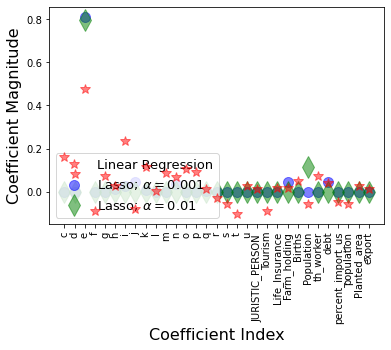

In [170]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Lasso; $\alpha = 0.001$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Regression & Ridge (L2)

In [171]:
from sklearn.linear_model import Ridge

## Perform regresssion with ridge 
## set alpha (weight of penalty term) = 1

X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

ridge = Ridge(alpha=0.05)
model = ridge.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04172211125224192, 0.9799205253660044]

In [172]:
[model.coef_, model.intercept_]

[array([ 0.13146242,  0.0777769 ,  0.32863465, -0.04716728,  0.00486116,
        -0.00305452,  0.15880701, -0.02392524,  0.07363773,  0.0617422 ,
         0.08815806,  0.05090768,  0.07199387,  0.07103375,  0.00509645,
        -0.0152278 , -0.04517838, -0.07596434,  0.03366426,  0.03102143,
        -0.04639396, -0.01117539,  0.0434503 ,  0.0293521 , -0.00122099,
         0.07355654,  0.08895929, -0.03202778, -0.01622484,  0.00162984,
         0.01938021]),
 -0.0035687478194731392]

In [173]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-0.07596434368944606,
 -0.04716727616443345,
 -0.04639396084416239,
 -0.04517838270983909,
 -0.0320277755557096,
 -0.023925240075401283,
 -0.016224838730834495,
 -0.015227798669679965,
 -0.011175387262994385,
 -0.0030545172919870106,
 -0.0012209891835462117,
 0.0016298375309319324,
 0.004861155418569213,
 0.005096445007107181,
 0.019380207826005774,
 0.02935209949948367,
 0.03102143122674439,
 0.03366426459788857,
 0.043450296872465544,
 0.05090768042667716,
 0.06174220333778513,
 0.07103375315236421,
 0.07199386841871908,
 0.07355654036095799,
 0.07363772847340397,
 0.07777690358725738,
 0.08815805687057786,
 0.08895929431127539,
 0.1314624249238247,
 0.1588070062654414,
 0.328634650711085]

In [174]:
update_vars

['t',
 'f',
 'Tourism',
 's',
 'percent_import_us',
 'j',
 'population',
 'r',
 'Life_Insurance',
 'h',
 'Population',
 'Planted_area',
 'g',
 'q',
 'export',
 'Births',
 'JURISTIC_PERSON ',
 'u',
 'Farm_holding',
 'n',
 'l',
 'p',
 'o',
 'th_worker',
 'k',
 'd',
 'm',
 'debt',
 'c',
 'i',
 'e']

In [175]:
len(update_vars)

31

In [176]:
ridge = Ridge(alpha=10)
model2 = ridge.fit(X_train, y_train)
y_pred = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.09725934715795237, 0.8908854936491822]

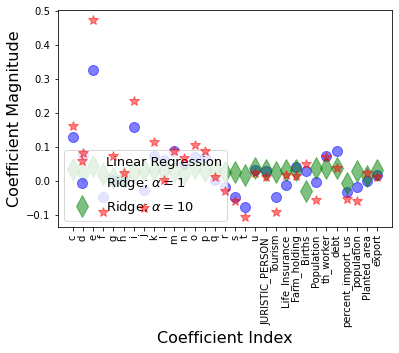

In [177]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Ridge; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Random Forest

In [178]:
df = dummy_df.copy()
df = df.dropna()

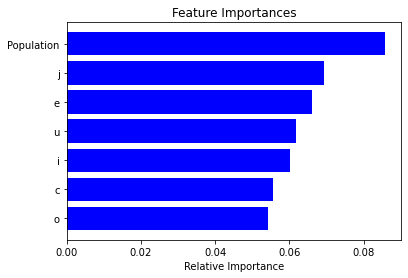

In [179]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.b)

n_features = 7

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Choose features with large feature importance

In [180]:
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars

['Population', 'j', 'e', 'u', 'i', 'c', 'o']

In [181]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.02950333056522816, 0.9899593487514676]